In [1]:
import csv
import glob
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
import numpy as np

In [2]:
def getAve(arr):
    return sum([int(x) for x in arr]) / len(arr)

def getListOfFiles(re, _pre = 7, _post = 4):
    return sorted(glob.glob(re), key=lambda s: int(s[_pre:-1 * _post]))

def getFirstRowOfCsv(file_name):
    with open(file_name, newline='') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        # Retun the first row
        for row in spamreader:
            return row

In [3]:
### Global Variables
y = []
err = []
# fileRE = '../experiments/Exp1-aws-ganache-done/final-sep/Exp1-aws1-new-contract-sep-trial#*.csv'
fileRE = '../experiments/Exp4-20C-trial#*.csv'

# fileRE = '../experiments/Exp1-aws-ganache-done/Exp1-aws2-*.csv'
preChar = 26 + 4
postChar = 4

In [4]:
### Main Execution

rows = np.empty([10,10])

for row_id,file_name in enumerate(getListOfFiles(fileRE,preChar,postChar)):
    row = np.asarray(getFirstRowOfCsv(file_name))
    
    print(file_name, row)
    rows[row_id] = row

rows_t = np.transpose(rows)

for r in rows_t:
    y.append(getAve(r))
    err.append(np.std(r.astype(np.float)))

../experiments/Exp4-20C-trial#1.csv ['974' '1841' '2614' '3431' '4306' '5107' '6037' '6700' '7646' '8685']
../experiments/Exp4-20C-trial#2.csv ['990' '1882' '2807' '3600' '4373' '5097' '5992' '6863' '7719' '8564']
../experiments/Exp4-20C-trial#3.csv ['989' '1828' '2686' '3554' '4370' '5321' '6256' '7105' '7987' '8879']
../experiments/Exp4-20C-trial#4.csv ['1029' '1961' '2768' '3720' '4627' '5498' '6407' '7274' '8224' '9151']
../experiments/Exp4-20C-trial#5.csv ['1023' '1880' '2826' '3784' '4676' '5669' '6503' '7368' '8371' '9349']
../experiments/Exp4-20C-trial#6.csv ['1059' '1921' '2818' '3803' '4720' '5576' '6613' '7573' '8342' '9296']
../experiments/Exp4-20C-trial#7.csv ['1067' '1931' '2820' '3820' '4679' '5553' '6509' '7312' '8164' '9089']
../experiments/Exp4-20C-trial#8.csv ['1079' '2062' '2909' '3891' '4722' '5697' '6538' '7576' '8454' '9403']
../experiments/Exp4-20C-trial#9.csv ['1076' '2007' '3068' '4045' '4738' '5829' '6693' '7615' '8542' '9425']
../experiments/Exp4-20C-trial#1

[1035.6 1929.1 2829.9 3749.6 4603.6 5513.2 6414.3 7294.9 8202.1 9143.8]
[ 2  4  6  8 10 12 14 16 18 20]
[38.05312076558242, 70.58392168192412, 125.82483856536436, 169.98541113872096, 173.9064116126832, 247.50385855578094, 229.72812191806207, 302.2047153834632, 308.9891422040587, 321.98751528591913]


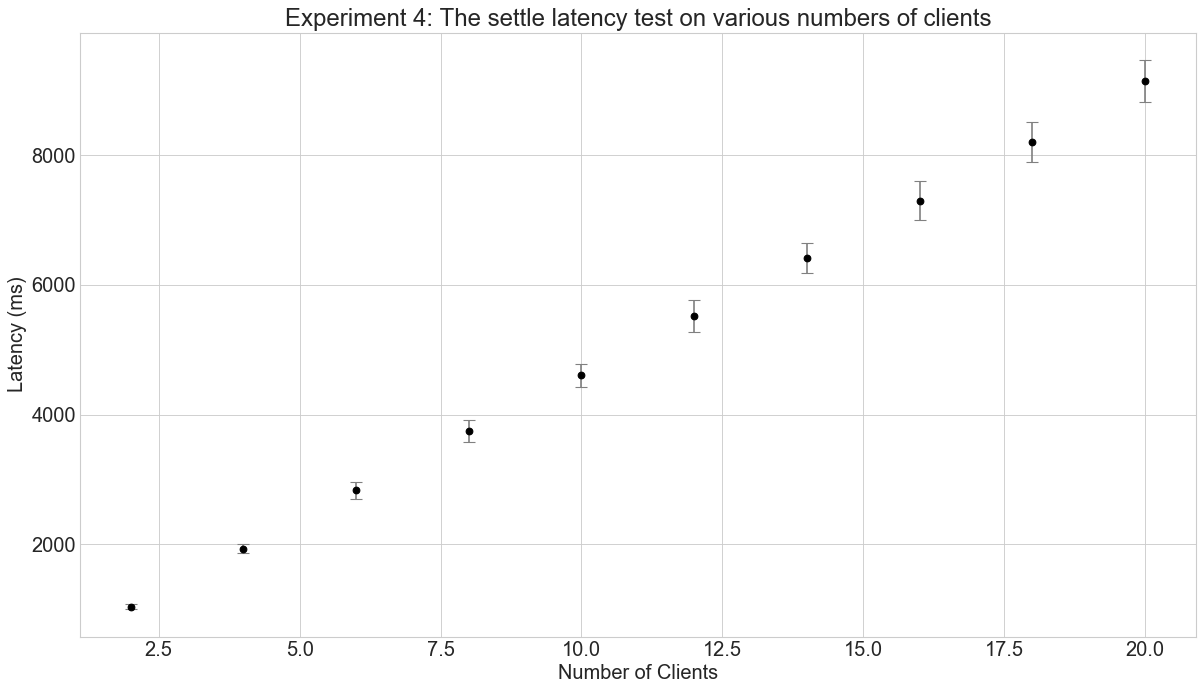

In [5]:
x = np.arange(2,21,2)
# x = np.arange(10,101,10)
y = np.asarray(y)
print(y)
print(x)
print(err)

plt.figure(num=None, figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams.update({'font.size': 18})
# plt.xticks(np.arange(0, 21, step=1))
# plt.yticks(np.arange(0, 70000, step=10000))
# plt.xlabel("Number of consensuses (Custodian)")
# plt.xlabel("Participation threshold (%)")
plt.xlabel("Number of Clients")
plt.ylabel("Latency (ms)")
plt.title("Experiment 4: The settle latency test on various numbers of clients")
plt.errorbar(x, y, err, fmt="ok", capsize=5, ecolor="grey");

In [6]:
# saveName = "Exp1"
# plt.savefig('../figures/'+saveName+'.png')